# Exploring numerical variables

## Dot plots and the mean

## Import data

In [88]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loan50.csv"

df = pd.read_csv(ROOT + DATA)

df["interest_rate"] = df["interest_rate"].astype("int64")

In [7]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"

colors_blue = [blue, blue_light]

## Dot plot

A dot plot of interest rate for the loan50 dataset. The rates have been rounded and the distribution’s mean is shown as a red triangle.

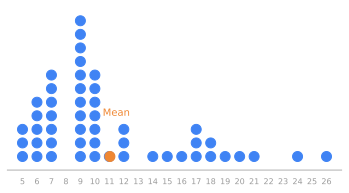

In [89]:
import numpy as np

# Prepara data
mean = df["interest_rate"].mean()
interest_rate = df["interest_rate"]
values, counts = np.unique(interest_rate, return_counts=True)

# Create dot plot
fig, ax = plt.subplots(figsize=(6, 3))
for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'o', ms=10, linestyle='', color=blue)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
# Define optics
ax.yaxis.set_visible(False)
ax.set_ylim(-1, max(counts))
ax.spines['bottom'].set_color(grey)
ax.set_xticks(range(min(values), max(values)+1))
ax.tick_params(axis='x', length=0, pad=8, labelsize=8, colors=grey)
# Anotation
ax.plot(mean, 0, 'o', ms=10, color=orange)
ax.annotate(text='Mean', xy=(mean-0.5, 3), color=orange)

plt.show();

In [91]:
print(mean)

11.04


The sample mean can be calculated as the sum of the observed values divided by the number of observations:  


$$ \bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} $$

### Asthma example

Results of a trial of 1500 adults that suffer from asthma;

In [95]:
d= {'Description': ["Number of patients", "Total asthma attacks"], 'New drug': [500, 200], 'Standard drug': [1000, 300]}
drug_asthma = pd.DataFrame(data=d)
drug_asthma

,Description,New drug,Standard drug
0,Number of patients,500,1000
1,Total asthma attacks,200,300


In [98]:
# Asthma attacks per patients
new_drug = 200/500
standard_drug = 300/1000

print("New drug: 200/500 = ", new_drug, "asthma attacks per patient")
print("Standrard drug: 300/1000 = ", standard_drug, "asthma attacks per patient")


New drug: 200/500 =  0.4 asthma attacks per patient
Standrard drug: 300/1000 =  0.3 asthma attacks per patient


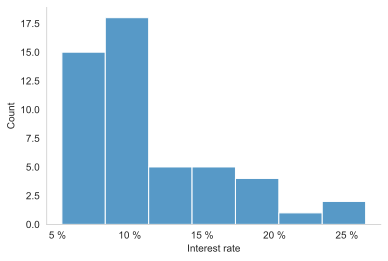

In [7]:
import matplotlib.ticker as ticker

sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots()

sns.histplot(data=df,  x= "interest_rate", palette=colors_blue)

# Use automatic Formatter
#ax.yaxis.set_major_formatter('{x:1.0f} k $')
#ax.yaxis.set_tick_params(which='major', labelcolor='grey', labelleft=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter('%'))
#ax.xaxis.set_tick_params(which='major', labelcolor='grey')  

#ax.xaxis.label.set_color('grey')
#ax.yaxis.label.set_color('grey')

plt.xlabel("Interest rate")
plt.ylabel("Count")

# remove top and right axes splines
sns.despine()

plt.show();

## Scatterplot with statistical model

- A scatterplot of the median household income against the poverty rate for the county dataset.
- A statistical model has also been fit to the data and is shown as orange line.

In [19]:
data

array([ 0,  8,  7,  0, 11,  2,  3,  2,  4,  2,  4, 10,  5, 12,  5,  3, 10,
       10, 11, 11,  0,  6,  3,  3,  3, 10, 10,  2,  5,  9,  1,  8,  5, 12,
        9,  3, 10, 10,  2,  6])